<a href="https://colab.research.google.com/github/lubamin14/-/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85(%D0%B2%D0%B8%D0%BD%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Тема 4: Исследовательский анализ данных

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## загрузка данных

In [16]:
url = "https://drive.google.com/uc?id=1mjBaWTQopVQzhVOj3oRw4g8UYz9AeK6x"
data = pd.read_csv(url)

## размерность данных

In [4]:
print("Размерность данных:", data.shape)

Размерность данных: (20000, 10)


## Количество пропущенных значений в каждой переменной


In [17]:
print("Пропущенные значения:\n", data.isnull().sum())

Пропущенные значения:
 country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64


## Тип данных каждой переменной

In [25]:
print("Типы данных:\n", data.dtypes)

Типы данных:
 country           object
description       object
designation       object
points             int64
price            float64
province          object
region_1          object
region_2          object
variety           object
winery            object
color_encoded     object
dtype: object


In [35]:
# 1. Обработка пустых значений
data.dropna(inplace=True)  # Удаление строк с пустыми значениями

# 2. Удаление дубликатов
data.drop_duplicates(inplace=True)

# 3. Описательная статистика
print(data.describe())

            points        price
count  4476.000000  4476.000000
mean     88.457775    38.124665
std       3.469162    24.969776
min      80.000000     7.000000
25%      86.000000    22.000000
50%      88.000000    34.000000
75%      91.000000    47.000000
max      99.000000   300.000000


##Кодирование цвета вина

In [18]:
color_map = {
    "Chardonnay": "white", "Pinot Noir": "red", "Cabernet Sauvignon": "red",
    "Red Blend": "red", "Bordeaux-style Red Blend": "red", "Sauvignon Blanc": "white",
    "Syrah": "red", "Riesling": "white", "Merlot": "red", "Zinfandel": "red",
    "Sangiovese": "red", "Malbec": "red", "White Blend": "white", "Rosé": "other",
    "Tempranillo": "red", "Nebbiolo": "red", "Portuguese Red": "red",
    "Sparkling Blend": "other", "Shiraz": "red", "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red", "Barbera": "red", "Pinot Gris": "white",
    "Viognier": "white", "Bordeaux-style White Blend": "white", "Champagne Blend": "other",
    "Port": "red", "Grüner Veltliner": "white", "Gewürztraminer": "white",
    "Portuguese White": "white", "Petite Sirah": "red", "Carmenère": "red"
}

data['color_encoded'] = data['variety'].map(color_map)


In [22]:
data = data.dropna(subset=['color_encoded'])

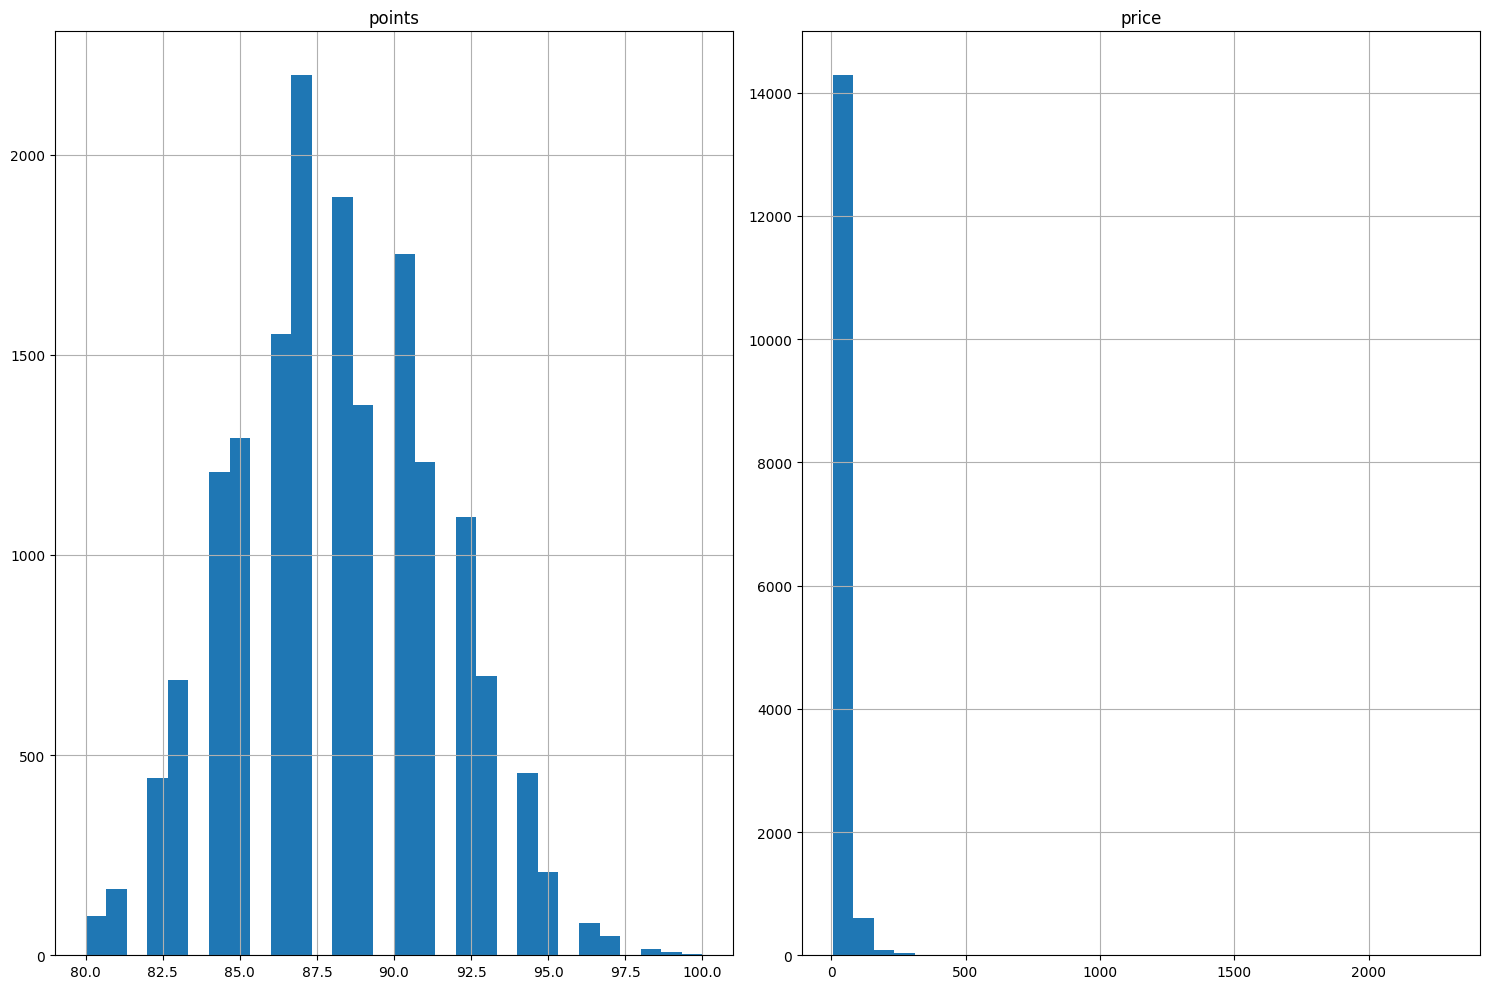

In [25]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

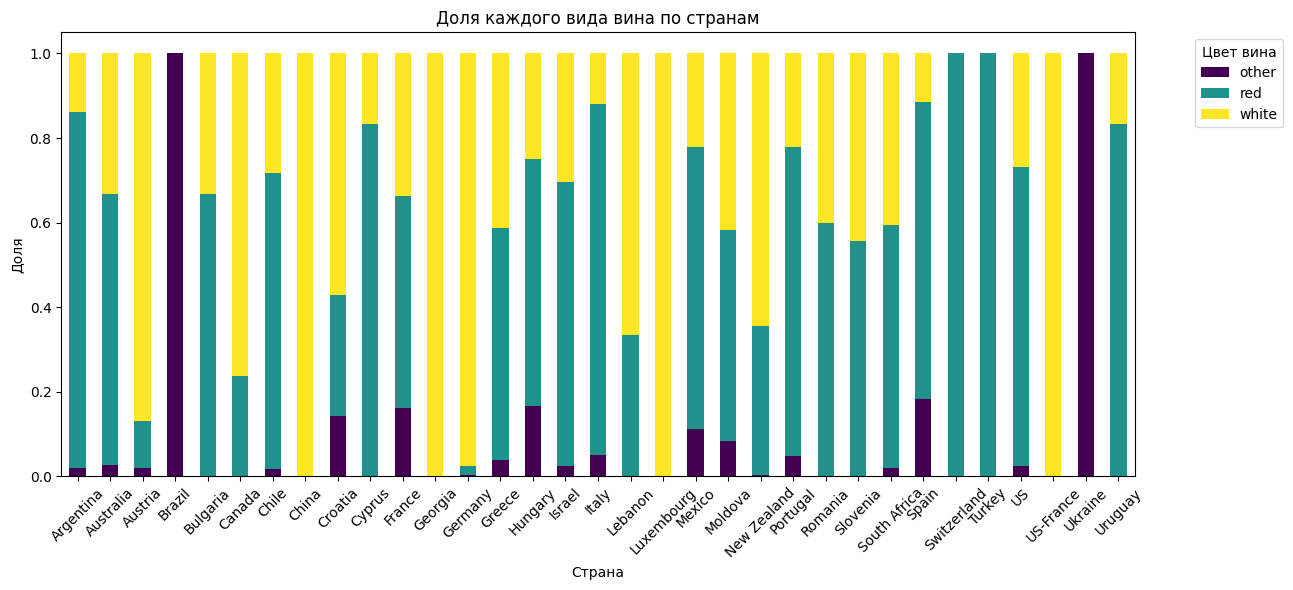

In [27]:
# 8. Доля каждого вида вина по странам
# Предполагается, что wine_share уже создан
wine_share = data.groupby(['country', 'color_encoded']).size().unstack(fill_value=0)
wine_share = wine_share.div(wine_share.sum(axis=1), axis=0)

# Визуализация
plt.figure(figsize=(13, 6))  # Увеличиваем размер графика
wine_share.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Доля каждого вида вина по странам')
plt.xlabel('Страна')
plt.ylabel('Доля')
plt.xticks(rotation=45)
plt.legend(title='Цвет вина', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Для лучшего отображения
plt.show()


<Figure size 3100x1900 with 0 Axes>

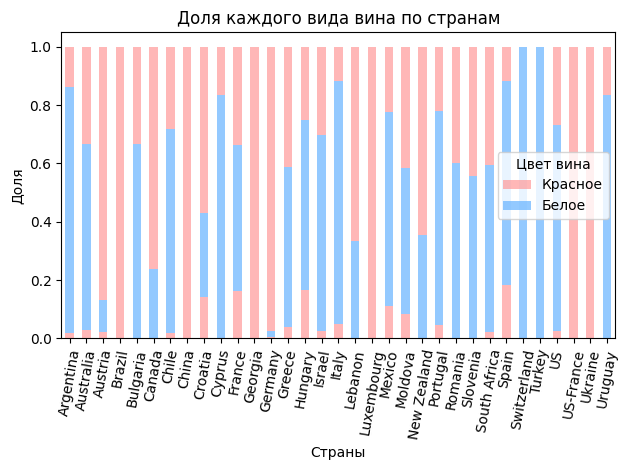

In [28]:
# 9. Страна с наибольшей долей белого и красного вина

# Визуализация доли каждого вида вина по странам
plt.figure(figsize=(31, 19))
wine_share.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], alpha=0.7)
plt.title('Доля каждого вида вина по странам')
plt.xlabel('Страны')
plt.ylabel('Доля')
plt.xticks(rotation=80)
plt.legend(title='Цвет вина', labels=['Красное', 'Белое'])
plt.tight_layout()
plt.show()




In [29]:
# Визуализация стран с наибольшей долей белого и красного вина
plt.figure(figsize=(8, 5))
sns.barplot(x=[white_wine_country, red_wine_country], y=[wine_share.loc[white_wine_country, 'white'], wine_share.loc[red_wine_country, 'red']], palette='pastel')  # Устранено предупреждение
plt.title('Страны с наибольшей долей белого и красного вина')
plt.ylabel('Доля')
plt.xticks(rotation=90)
plt.show()


NameError: name 'white_wine_country' is not defined

<Figure size 800x500 with 0 Axes>

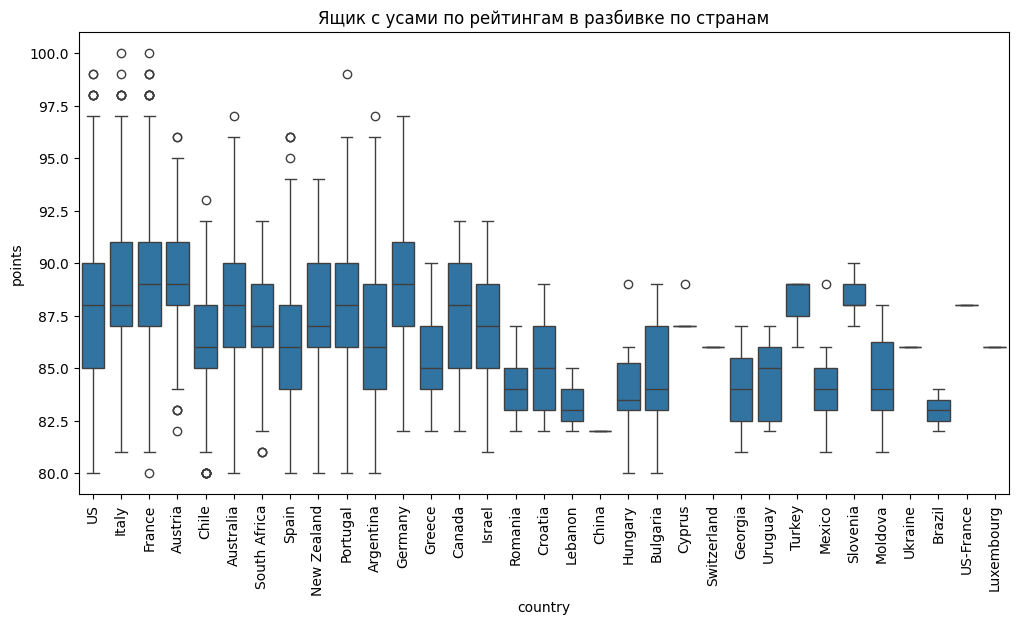

In [30]:
# 10. Построение графика «ящик с усами» по рейтингам
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='points', data=data)  # Изменено на boxplot
plt.xticks(rotation=90)
plt.title('Ящик с усами по рейтингам в разбивке по странам')
plt.show()



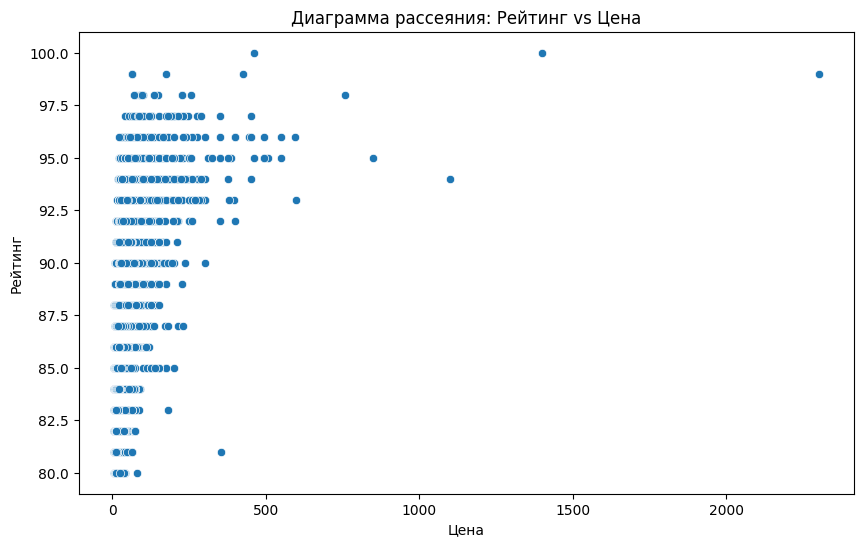

Корреляция между рейтингами и ценами: 0.42590451631332665


In [31]:
# 11. Диаграмма рассеяния и корреляция между рейтингами и ценами
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='points', data=data)
plt.title('Диаграмма рассеяния: Рейтинг vs Цена')
plt.xlabel('Цена')
plt.ylabel('Рейтинг')
plt.show()

correlation = data['price'].corr(data['points'])
print("Корреляция между рейтингами и ценами:", correlation)


## 6.Ответы на вопросы